In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
plt.ion() 


In [2]:
X = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)


In [5]:
y = np.tanh(5 * np.pi * X)


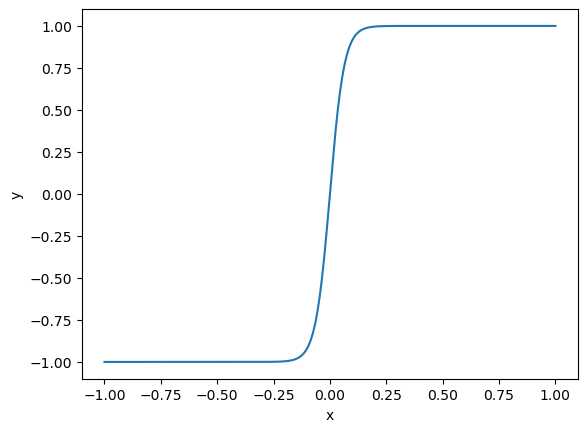

In [6]:
plt.plot(X.detach().numpy(), y.detach().numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.show()  


In [ ]:
#------------------------------------------Model0------------------------------------#

In [7]:
class Model0(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10, h4=10, h5=10, h6=10, h7=10, h8=5, out_features=1):
        super(Model0, self).__init__()
        self.layer1 = nn.Linear(in_features, h2)    # input layer
        self.layer2 = nn.Linear(h2, h3)
        self.layer3 = nn.Linear(h3, h4)
        self.layer4 = nn.Linear(h4, h5)
        self.layer5 = nn.Linear(h5, h6)
        self.layer6 = nn.Linear(h6, h7)
        self.layer7 = nn.Linear(h7, h8)
        self.output = nn.Linear(h8, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = self.output(x)
        return x


In [8]:
model_zero = Model0()


In [9]:
criterion = nn.MSELoss()


In [10]:
optimizer = torch.optim.Adam(model_zero.parameters(), lr=0.001)


In [11]:
epochs = 2000
mod0_losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model_zero(x=X)  # Using model_zero(x) instead of model_zero.forward(X)
    
    # Compute loss
    loss = criterion(y_pred, y)
    
    # Append loss to a list for plotting and analysis
    mod0_losses.append(loss.item())  # Use .item() to get a Python number from the tensor
    
    # Zero gradients before the backward pass
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    
    # Optimization step: update weights
    optimizer.step()


In [12]:
mod0_losses = torch.tensor(mod0_losses)


In [ ]:
#--------------------------------------------------Model1---------------------------#

In [13]:
class Model1(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18, h4=15, h5=4, out_features=1):
        super(Model1, self).__init__()
        self.layer1 = nn.Linear(in_features, h2)    # input layer
        self.layer2 = nn.Linear(h2, h3)
        self.layer3 = nn.Linear(h3, h4)
        self.layer4 = nn.Linear(h4, h5)
        self.output = nn.Linear(h5, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = self.output(x)
        return x


In [14]:
model_one = Model1()


In [15]:
model_one

Model1(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=18, bias=True)
  (layer3): Linear(in_features=18, out_features=15, bias=True)
  (layer4): Linear(in_features=15, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
)

In [16]:
criterion = nn.MSELoss()

In [17]:
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.001)


In [18]:
epochs = 2000
mod1_losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred_mod1 = model_one(x=X)  # Using model_one(x=X) instead of model_one.forward(X)
    
    # Compute loss
    loss = criterion(y_pred_mod1, y)
    
    # Append loss to a list for plotting and analysis
    mod1_losses.append(loss.item())  # Use .item() to get a Python number from the tensor
    
    # Zero gradients before the backward pass
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    
    # Optimization step: update weights
    optimizer.step()


In [19]:
mod1_losses = torch.tensor(mod1_losses)


In [ ]:
#------------------------------------------Model2-------------------------------------#

In [20]:
class Model2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(in_features, h2)  # input layer
        self.output = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.output(x)
        return x


In [21]:
model_two = Model2()


In [22]:
criterion = nn.MSELoss()


In [23]:
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.001)


In [24]:
epochs = 2000
mod2_losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred_mod2 = model_two(x=X)  # Using model_two(x=X) instead of model_two.forward(X)
    
    # Compute loss
    loss = criterion(y_pred_mod2, y)
    
    # Append loss to a list for plotting and analysis
    mod2_losses.append(loss.item())  # Use .item() to get a Python number from the tensor
    
    # Zero gradients before the backward pass
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    
    # Optimization step: update weights
    optimizer.step()


In [25]:
mod2_losses = torch.tensor(mod2_losses)


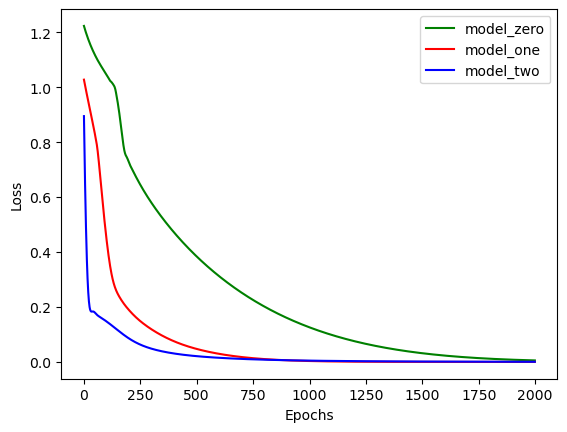

In [26]:
plt.plot(range(epochs), mod0_losses.numpy(), 'g', label='model_zero')
plt.plot(range(epochs), mod1_losses.numpy(), 'r', label='model_one')
plt.plot(range(epochs), mod2_losses.numpy(), 'b', label='model_two')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


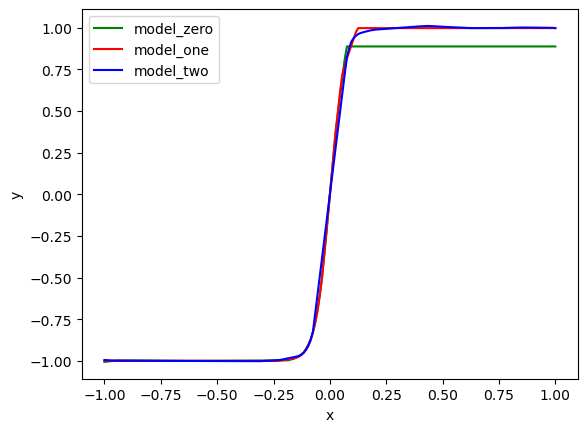

In [27]:
# Plotting all Models
plt.plot(X.numpy(), y_pred.detach().numpy(), 'g', label='model_zero')
plt.plot(X.numpy(), y_pred_mod1.detach().numpy(), 'r', label='model_one')
plt.plot(X.numpy(), y_pred_mod2.detach().numpy(), 'b', label='model_two')
plt.legend()

plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [ ]:
#=====================================

In [7]:
import torch
import torch.nn as nn  
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in Jupyter notebooks
plt.ion()

# Create a tensor of 150 values between -1 and 1, reshaped into a column vector
X1 = torch.linspace(-1, 1, 150).reshape(-1, 1)


In [8]:
y1 = np.exp(-5 * X1)


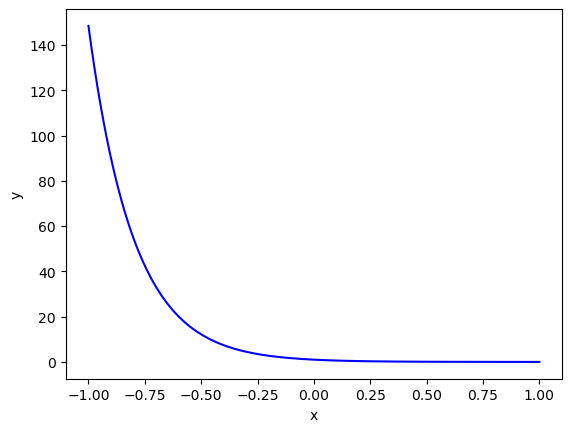

In [35]:
plt.plot(X1.numpy(), y1, 'b')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Modelzf2(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10, h4=10, h5=10, h6=10, h7=10, h8=5, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h2)    # Input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, out_features)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function
        x = F.relu(self.fc2(x))  # Apply ReLU activation function
        x = F.relu(self.fc3(x))  # Apply ReLU activation function
        x = F.relu(self.fc4(x))  # Apply ReLU activation function
        x = F.relu(self.fc5(x))  # Apply ReLU activation function
        x = F.relu(self.fc6(x))  # Apply ReLU activation function
        x = F.relu(self.fc7(x))  # Apply ReLU activation function
        x = self.out(x)          # Output layer without activation function
        return x


In [2]:
model_zero_f2 = Modelzf2()


In [3]:
total_params = sum(param.numel() for param in model_zero_f2.parameters())

print("Number of parameters in model =", total_params)


Number of parameters in model = 571


In [4]:
criterion = nn.MSELoss()


In [5]:
optimizer = torch.optim.Adam(model_zero_f2.parameters(), lr=0.001)


In [9]:
epochs = 2000
mod0_losses_f2 = []

for epoch in range(epochs):
    # Forward pass
    y_pred_mod0_f2 = model_zero_f2(X1)
    
    # Compute loss (error)
    loss = criterion(y_pred_mod0_f2, y1)
    
    # Append loss to a list for plotting and analysis
    mod0_losses_f2.append(loss.item())
    
    # Reset gradients
    optimizer.zero_grad()
    # Backward pass to compute gradients
    loss.backward()
    # Optimization step to update weights and biases
    optimizer.step()


In [10]:
mod0_losses_f2 = torch.tensor(mod0_losses_f2)


In [12]:
class Modelof2(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18, h4=15, h5=4, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x


In [13]:
model_one_f2 = Modelof2()


In [14]:
total_params = sum(param.numel() for param in model_one_f2.parameters())
print("Number of parameters in model =", total_params)


Number of parameters in model = 572


In [15]:
criterion = nn.MSELoss()


In [16]:
optimizer = torch.optim.Adam(model_one_f2.parameters(), lr=0.001)


In [17]:
epochs = 2000
mod1_losses_f2 = []

for _ in range(epochs):
    # Forward pass
    y_pred_mod1_f2 = model_one_f2(X1)
    
    # Compute loss
    loss = criterion(y_pred_mod1_f2, y1)
    
    # Append loss to list for plotting and analysis
    mod1_losses_f2.append(loss.item())
    
    # Reset gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update parameters
    optimizer.step()


In [18]:
mod1_losses_f2 = torch.tensor(mod1_losses_f2)


In [19]:
class Model2f2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h2)   
        self.out = nn.Linear(h2, out_features) 
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x


In [20]:
model_two_f2 = Model2f2()


In [21]:
model_two_f2

Model2f2(
  (fc1): Linear(in_features=1, out_features=190, bias=True)
  (out): Linear(in_features=190, out_features=1, bias=True)
)

In [22]:
total_params = sum(param.numel() for param in model_two_f2.parameters())
print("parameters =", total_params)


parameters = 571


In [23]:
criterion = nn.MSELoss(reduction='mean')


In [24]:
optimizer = torch.optim.Adam(params=model_two_f2.parameters(), lr=0.001)


In [25]:
epochs = 2000
mod2_losses_f2 = []

for _ in range(epochs):
    # Forward pass
    y_pred_mod2_f2 = model_two_f2(X1)
    
    # Compute loss
    loss = criterion(y_pred_mod2_f2, y1)
    
    # Store loss for analysis
    mod2_losses_f2.append(loss.item())
    
    # Zero gradients, backpropagate, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [26]:
mod2_losses_f2 = torch.tensor(mod2_losses_f2)


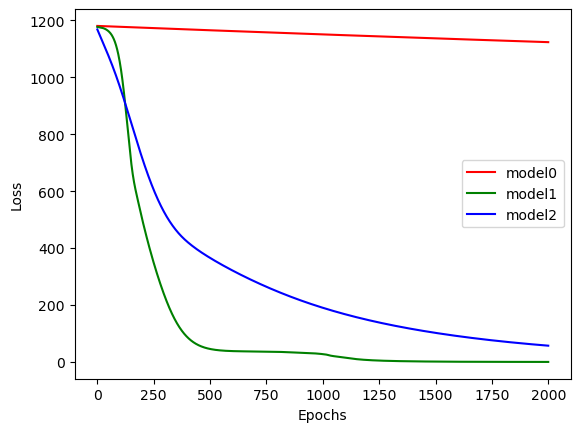

In [27]:
# Plotting loss vs epochs for all models using F2
plt.plot(range(epochs), mod0_losses_f2.numpy(), 'r', label='model0')
plt.plot(range(epochs), mod1_losses_f2.numpy(), 'g', label='model1')
plt.plot(range(epochs), mod2_losses_f2.numpy(), 'b', label='model2')

plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


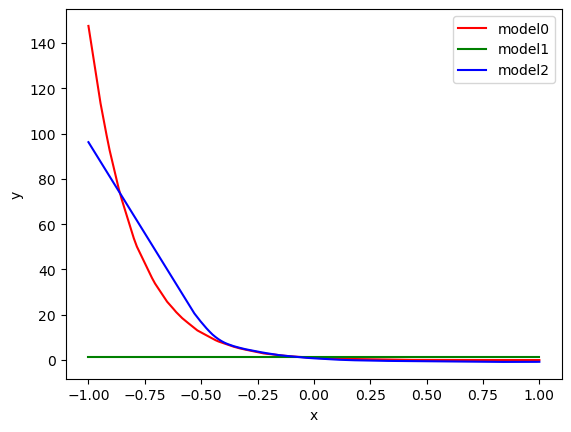

In [60]:
# Plotting predicted values for all models
plt.plot(X1.numpy(), y_pred_mod0_f2.detach().numpy(), 'r', label='model0')
plt.plot(X1.numpy(), y_pred_mod1_f2.detach().numpy(), 'g', label='model1')
plt.plot(X1.numpy(), y_pred_mod2_f2.detach().numpy(), 'b', label='model2')

plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()
